In [1]:
#importação das bibliotecas
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import cv2
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
#parâmetros e preparação dos diretórios

# Tamanho das imagens e batch size (quantas imagens são processadas por vez)
image_size = (128, 128)
batch_size = 32

# Gerador de dados com aumento artificial (data augmentation)
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Carregando o conjunto de treino
train_generator = train_datagen.flow_from_directory(
    "dataset/train",  # caminho da pasta com as imagens organizadas por classes
    target_size=image_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="training"
)

# Carregando o conjunto de validação
val_generator = train_datagen.flow_from_directory(
    "dataset/train",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="validation"
)


Found 2352 images belonging to 2 classes.
Found 588 images belonging to 2 classes.


In [3]:
#criação do modelo CNN

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilando o modelo
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Exibindo o resumo da rede
model.summary()


C:\Users\Windows 10\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
#treinamento do modelo

epochs = 50  # Você pode aumentar para 20 ou 30 se quiser

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)


C:\Users\Windows 10\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.4866 - loss: 0.7945 - val_accuracy: 0.5119 - val_loss: 0.6874
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.5914 - loss: 0.6613 - val_accuracy: 0.5629 - val_loss: 0.6977
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.7141 - loss: 0.5717 - val_accuracy: 0.6735 - val_loss: 0.5749
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.8114 - loss: 0.4357 - val_accuracy: 0.7262 - val_loss: 0.4907
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.8300 - loss: 0.3704 - val_accuracy: 0.7772 - val_loss: 0.4236
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.8356 - loss: 0.3643 - val_accuracy: 0.8435 - val_loss: 0.3750
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.8653 - loss: 0.2962 - val_accuracy: 0.8622 - val_loss: 0.3309
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.8618 - loss: 0.2976 - val_accuracy: 0.8316 - v

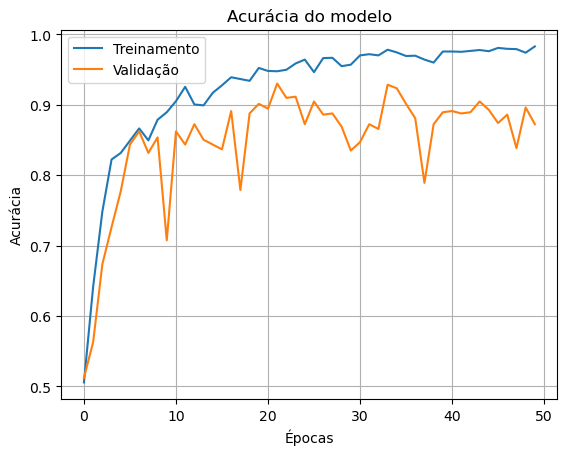

In [9]:
#visualização do desempenho

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, label='Treinamento')
plt.plot(val_acc, label='Validação')
plt.title("Acurácia do modelo")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()
plt.grid(True)
plt.show()


In [4]:

#teste
from tensorflow.keras.models import load_model

model = load_model('C:/Users/Windows 10/Desktop/Rede Neural - Própria/modelo_stradia.keras')
import cv2
import numpy as np
def predict_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Imagem não encontrada: {image_path}")

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)[0][0]
    print(f"Probabilidade: {prediction:.4f}")
    return "Pavimentada" if prediction > 0.5 else "Não pavimentada"

#Exemplo de teste
print(predict_image("dataset/teste/turvo.png"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Probabilidade: 0.9977
Pavimentada


In [2]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Carrega o modelo salvo
model = load_model("C:/Users/Windows 10/Desktop/RedeNeural/modelo_stradia.keras")
print("Modelo carregado com sucesso!")

# Função para previsão de uma imagem
def predict_image_class(img_path):
    img = cv2.imread(img_path)
    if img is None:
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)[0][0]
    return "Não pavimentada" if prediction <= 0.5 else "Pavimentada"

# Função para determinar a condição da estrada
def determinar_condicao(percentual_desfasagem):
    if percentual_desfasagem <= 10:
        return "Muito boa"
    elif percentual_desfasagem <= 30:
        return "Boa"
    elif percentual_desfasagem <= 50:
        return "Regular"
    elif percentual_desfasagem <= 70:
        return "Ruim"
    else:
        return "Péssima"

# Função para atualizar HTML
def atualizar_html(arquivo_html, nome_estrada, percentual, condicao):
    cores = {
        "Péssima": "#FF0000",
        "Ruim": "#FF8000",
        "Regular": "#EEFF00",
        "Boa": "#95FF00",
        "Muito boa": "#408E24"
    }

    cor = cores.get(condicao, "#000000")  # Cor padrão caso não encontrada

    try:
        with open(arquivo_html, 'r', encoding='utf-8') as file:
            conteudo = file.read()

        conteudo = conteudo.replace('<p id="nome">AM-010</p>', f'<p id="nome">{nome_estrada}</p>')

        import re
        # Atualiza o percentual com cor
        conteudo = re.sub(
            r'(<p\s+id="percentual")(?:\s+style="[^"]*")?>[^<]*(</p>)',
            fr'\1 style="color: {cor}">{percentual:.2f}%\2',
            conteudo
        )

        # Atualiza a condição com cor
        conteudo = re.sub(
            r'(<h3\s+id="condicao")(?:\s+style="[^"]*")?>[^<]*(</h3>)',
            fr'\1 style="color: {cor}">{condicao}\2',
            conteudo
        )

        with open(arquivo_html, 'w', encoding='utf-8') as file:
            file.write(conteudo)

        print(f"Arquivo HTML atualizado: {arquivo_html}")
    except FileNotFoundError:
        print(f"Arquivo HTML não encontrado para a estrada: {nome_estrada}")

# Caminho base onde estão as pastas das estradas
base_path = "C:/Users/Windows 10/Desktop/RedeNeural/dataset/pasta_imagens"

# Pasta onde estão os HTMLs (ajuste conforme seu projeto)
caminho_htmls = "../../frontend/src/pages/dashboard/estrada"

# Percorrer todas as pastas (estradas)
for estrada in os.listdir(base_path):
    pasta_estrada = os.path.join(base_path, estrada)
    if not os.path.isdir(pasta_estrada):
        continue

    total = 0
    nao_pavimentadas = 0

    for img_nome in os.listdir(pasta_estrada):
        img_path = os.path.join(pasta_estrada, img_nome)
        resultado = predict_image_class(img_path)
        if resultado is None:
            continue
        total += 1
        if resultado == "Não pavimentada":
            nao_pavimentadas += 1

    if total == 0:
        print(f"{estrada}: Nenhuma imagem válida encontrada.")
        continue

    percentual = (nao_pavimentadas / total) * 100
    condicao = determinar_condicao(percentual)

    print(f"\nEstrada: {estrada}")
    print(f"Total de imagens: {total}")
    print(f"Não pavimentadas: {nao_pavimentadas} ({percentual:.2f}%)")
    print(f"Condição da estrada: {condicao}")

    # Formata o nome do arquivo HTML correspondente (ex: AM 010 -> am010.html)
    nome_arquivo_html = estrada.lower().replace(" ", "").replace("-", "") + ".html"
    caminho_arquivo_html = os.path.join(caminho_htmls, nome_arquivo_html)

    atualizar_html(caminho_arquivo_html, estrada, percentual, condicao)

Modelo carregado com sucesso!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━

In [205]:
#salvando e carregando modelo

# Salvar
model.save("modelo_stradia.keras")
print("Modelo Salvo")


Modelo Salvo
